## Image Classification model


In [1]:
# Load necessary libraries
import torch
import numpy as np
from fastai.vision.all import *
from ipywidgets import widgets

## Loading the Dataset

For this model, we use Google's [`Open Images Dataset v4`](https://storage.googleapis.com/openimages/web/index.html). There are [`600`](https://storage.googleapis.com/openimages/2018_04/bbox_labels_600_hierarchy_visualizer/circle.html) classess in this dataset. We use the `OIDv4_ToolKit` ((https://github.com/EscVM/OIDv4_ToolKit)) to load this dataset.

In [3]:
#!git clone https://github.com/EscVM/OIDv4_ToolKit.git
#!cd OIDv4_ToolKit/ && pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 120.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 8.2 MB/s eta 0:00:00
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: docutils
    Found existing installation: docutils 0.21.2
    Uninstalling docutils-0.21.2:
      Successfully uninstalled docutils-0.21.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sphinx 8.2.3 requires docutils<0.22,>=0.20, but you have docutils 0.16 which is incompatible.


In [4]:
#!cd OIDv4_ToolKit/ && python3 main.py -h

In [4]:
!cd OIDv4_ToolKit/ && python3 main.py downloader --Dataset /content --classes Cat Leopard Tiger Lion --type_csv train --limit 200


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Cat.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] y
...145%, 0 MB, 4758 KB/s, 0 seconds passed
[DOWNLOAD] | File class

## Model

In [7]:
# Identify Path
path = Path('train')

# Create datablock
transports = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)

# Create dataloader
dls = transports.dataloaders(path)

# Check the dataset
#dls.train.show_batch(max_n=32, nrows=4)

In [9]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(6)

epoch,train_loss,valid_loss,accuracy,time
0,1.581411,0.189888,0.925000,00:11


epoch,train_loss,valid_loss,accuracy,time
0,0.437456,0.187811,0.937500,00:11
1,0.296952,0.231582,0.943750,00:12
2,0.214120,0.255309,0.937500,00:12
3,0.161781,0.253337,0.937500,00:12
4,0.130572,0.267166,0.943750,00:12
5,0.105576,0.266038,0.943750,00:12


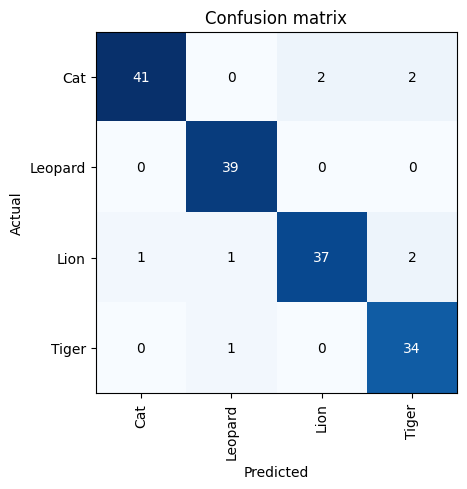

In [10]:
interpretation = ClassificationInterpretation.from_learner(learn)
interpretation.plot_confusion_matrix()

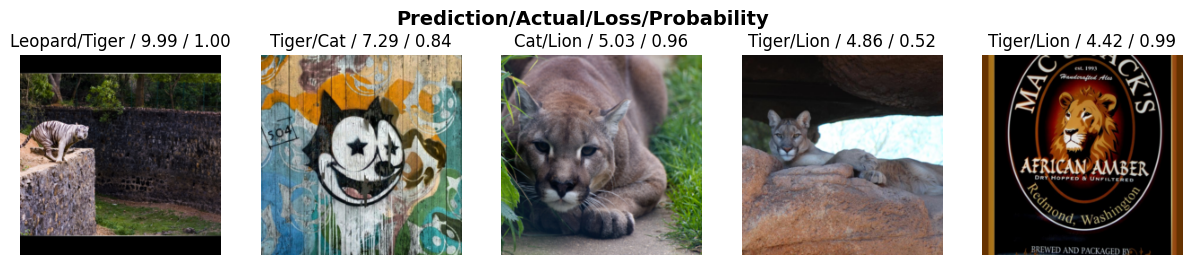

In [11]:
interpretation.plot_top_losses(5, nrows=1)

### Testing the model


In [12]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Prediction: Cat; Probability: 0.9999


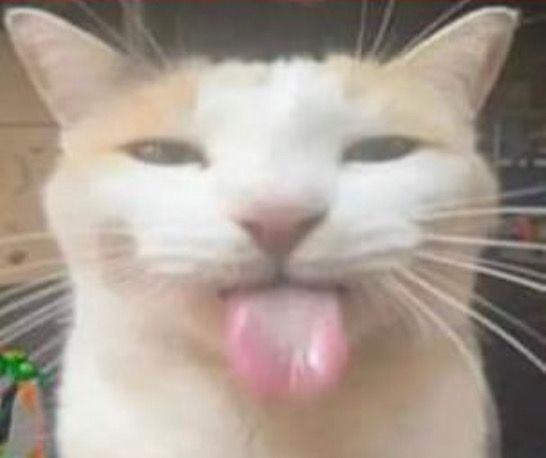

In [13]:
img = PILImage.create(upload.data[-1])
pred, pred_idx, probs = learn.predict(img)
print(f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}')
img

## Exporting the Model

In [14]:
learn.export('FelinesModel.pkl')

In [15]:
model = load_learner('FelinesModel.pkl')

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [16]:
model.predict(img)

('Cat', tensor(0), tensor([9.9990e-01, 9.5010e-05, 1.6019e-06, 5.8966e-07]))